## Structure sequential model

The sequential model is always built up in the following way:
First you initialize the model as sequential with `mode=Seqential()`. Then you can add layers to the model  with `mode.add()`. 
Layers need some input parameters to work. Depending on the layer the parameter change. We will explain all parameters below and link them to the layers. 


**Structure when working with images (CNN)**

The model structure starts with a first layer which has as additional information the input_size. Following layers do not need that as they orient on the first layer output. 
You can add all kinds of layers in different combination afterwards. For image classification you mainly mix `conv2D` layers with `MaxPolling` layers. For classification tasks, the last layer is often a dense layer with softmax activation and hidden_layers=number of classes. Thereby, the weight are "ziped" to the number of classes to classify. Before this last step, you have to flatten the data as it is still in form of the input dimensions which is e.g., 2D(grayscale), 3D(RGB), or 4D(RGBa). We want an array with a value per class. 
To increase bias and improve convergence you can drop a `dropout` layer once in a while. 
These base structures (shown below in the `Einfaches_CNN_Model` function) have been proven to work well for image classification tasks. 

The artist part is to combine all layers at hand in unique ways to obtain best results for the task. Known network structures such as VGG, ResNet,... can be seen as such artworks. 

**Structure when working with time series data (RNN)**

Models for timeseries data are very similar in their construction but use different layer compositions. 
The central difference is that the main layer is not the `Conv2D` but an `LSTM` or `GRU` layer wich are specific for time series analysis. The flatten layer is also not needed as the layers give an estimation output for each timestep.

**Structure when working with generative networks**

we will not look into generative networks :-)


## Main types of layer 

- **Conv1D (temporal sequence), Conv2D (image), Conv3D (volumen)**


- **Max- / sum- / mean- Pooling1D, ...2d**
  - pool_size=(2, 2), strides=None, padding='valid', data_format=None
 
   After the first convolution layer, the the dimensions can increase drastically. Therefore, downsampling is needed. 
  
   The pooling layer is a form of non linear down-sampling. An image is segmented into non overlapping rectangles and returns one max, sum or, mean value for each of this rectangles. Thereby, the size is reduced by the number of rectangles. 
  The different functions represent the patterns of the subregions differently. 

- **Dropout**
   - rate=  zero to one. Commonly used 0.3-0.6, noise_shape=None, (batch_size, 1, features) if you want the same dropout shape fro each batch, seed=42

    The dropout layer is used to reduce overfitting and correspondingly increase the generalization of a model by randomly (seed) setting some inputs to 0 during training. 
   Overfitting is  the case that the model starts to perfectly fit to the training data as it rahter learns the pattern of the training data instead of the general information of the pattern. Meaning that the model will perform very good on the training data, but as soon as you give it new data the performance is based on chance. 
   Dropout is a good mechanism to fight overfitting. Regularization is another tool. See below about regularization.
   
   
   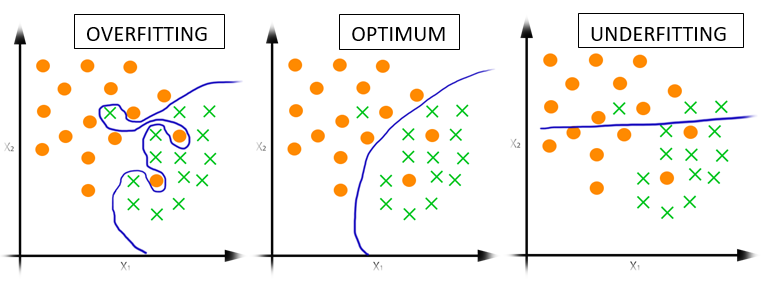
   

- **Flatten**

      The flatten layer only flattens the input. It does not change the batch size. Flatten is used to merge all the locally found information into a flattened 2D array. This is needed for the following dense layer, which 
      (None, 64, 32, 32) -> (None, 65536) , None is the batch dimension which is not affected
    

- **Dense (fully connected)**
   - units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
   
    The dense layer connects the layer before on a one to one level to the next layer. Meaning that all values from the previouse nodes/neurons are merged into one node/neuron of the dense layer.  
   Thereby, the dense layer applies a non-linear transformation on its input based on the (element wise) activation function. <div class="alert alert-block alert-warning">
   From Keras:
   Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True)
   <div>
   No activation function is chosen when we either want to reduce dimensionality and numbers of parameters or the output should be linear (as e.g, with regression). Reduced dimensionality is interesting when we have a problem with to many options. One example is finding words which belong together. You could just count the number context words with the given word, but that would be huge, so we first reduce dimensionality.





- **simpleRNN**

- **LSTM (CuDNNLSTM when using GPU)**

- **GRU (CuDNNGRU when using GPU)**

- **ConvLSTM2D**


- **merge**

- **embedding**

- **activation**


- **masking**

- **ActivityRegularization**

- **input**
- **Reshape**
- **permute**
- **RepeatVector**


## Parameter

 - **hidden layers or notes or neurons**
 
 
 - **input_shape**

   If you are using a sequential model, the first layer needs to know the input dimensions of your data. The data must have same dimensions over all samples(Images). (there are exceptions, but don^t go there)
   
   

- **num_category**

- **kernel_size**

- **activation**

## Optimizers

## Regularizers

## Activation functions


In [ ]:
def Einfaches_CNN_Model(input_shape,num_category):
    #model building
    model = Sequential()
    #convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    #32 convolution filters used each of size 3x3
    #again
    model.add(Conv2D(64, (3, 3), activation='relu'))
    #64 convolution filters used each of size 3x3
    #choose the best features via pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.25))
    #flatten since too many dimensions, we only want a classification output
    model.add(Flatten())
    #fully connected to get all relevant data
    model.add(Dense(128, activation='relu'))
    #one more dropout for convergence' sake :) 
    model.add(Dropout(0.5))
    #output a softmax to squash the matrix into output probabilities
    model.add(Dense(num_category, activation='softmax'))
    
    return(model)

## Structure for functional API models
